In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("../data/netflix_titles.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.shape

(8807, 12)

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
threshold = len(df) * 0.05
print(threshold)

440.35


In [18]:
columns_to_drop = df.columns[(df.isna().sum() <= threshold) & (df.isna().sum() > 0)]
print(columns_to_drop)

Index(['date_added', 'rating', 'duration'], dtype='object')


In [20]:
df.dropna(subset=columns_to_drop, inplace=True)
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")

In [22]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
unique_counts = df.nunique()
print(unique_counts)

show_id         8790
type               2
title           8790
director        4527
cast            7679
country          749
date_added      1765
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64


In [26]:
# Categorical columns: type, country, release_year, rating, listed_in
# Numerical columns: duration

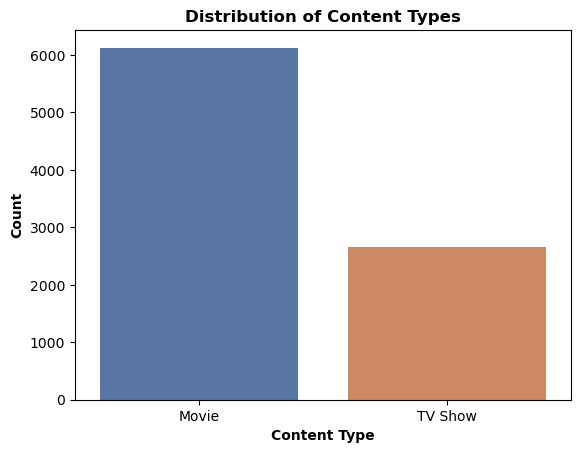

In [28]:
sns.countplot(data=df, x="type", hue="type", palette="deep")
plt.title("Distribution of Content Types", fontsize=12, fontweight="bold")
plt.xlabel("Content Type", fontsize=10, fontweight="bold")
plt.ylabel("Count", fontsize=10, fontweight="bold")
plt.show()

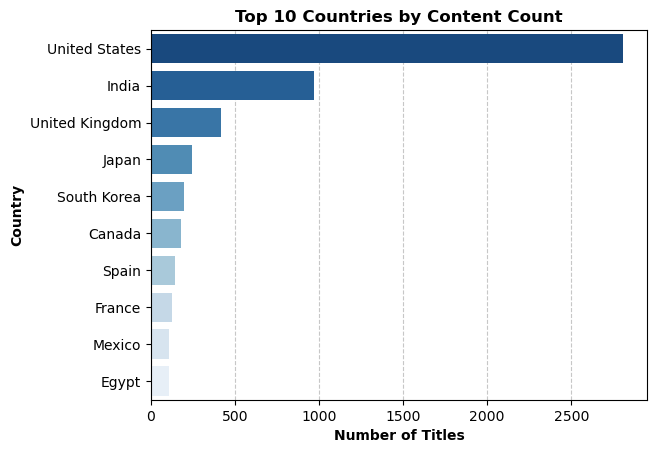

In [30]:
data = df["country"].value_counts().drop("Unknown").head(10).reset_index()
sns.barplot(data=data, y="country", x="count", hue="country", palette="Blues_r", zorder=2)
plt.title("Top 10 Countries by Content Count", fontsize=12, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=10, fontweight="bold")
plt.ylabel("Country", fontsize=10, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7, zorder=0)
plt.show()

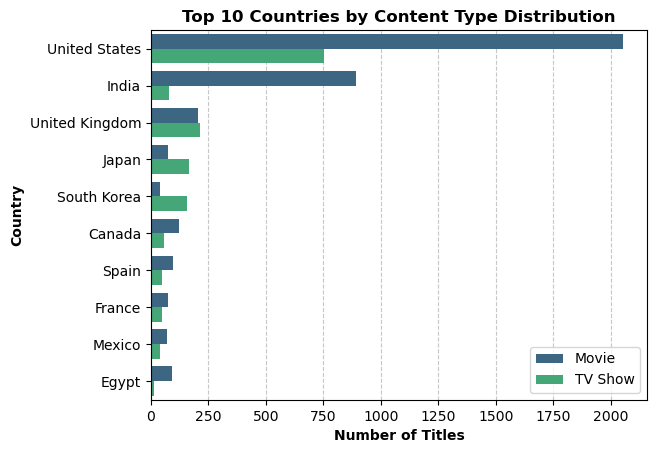

In [32]:
top_countries = df["country"].value_counts().drop("Unknown").head(10).index
data = df[df["country"].isin(top_countries)][["country", "type"]]
sns.countplot(data=data, y="country", hue="type", palette="viridis", order=top_countries, zorder=2)
plt.title("Top 10 Countries by Content Type Distribution", fontsize=12, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=10, fontweight="bold")
plt.ylabel("Country", fontsize=10, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7, zorder=0)
plt.legend().set_title("")
plt.show()

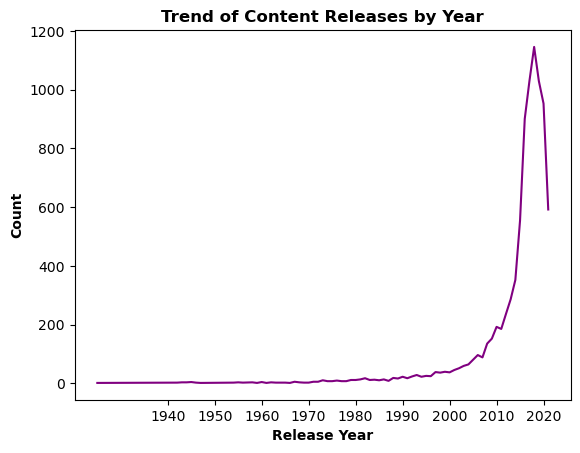

In [34]:
data = df["release_year"].value_counts().sort_index().reset_index()
sns.lineplot(data=data, x="release_year", y="count", color="purple")
plt.title("Trend of Content Releases by Year", fontsize=12, fontweight="bold")
plt.xlabel("Release Year", fontsize=10, fontweight="bold")
plt.ylabel("Count", fontsize=10, fontweight="bold")
plt.xticks(ticks=range(1940, 2022, 10), labels=range(1940, 2022, 10))
plt.show()